In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the Data

### Loading the Data

In [68]:
df = pd.read_csv('fake_reg.csv')

In [69]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [70]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Exploring the Data

**We should see strong correlation between the features and the "price" of this made up product.**

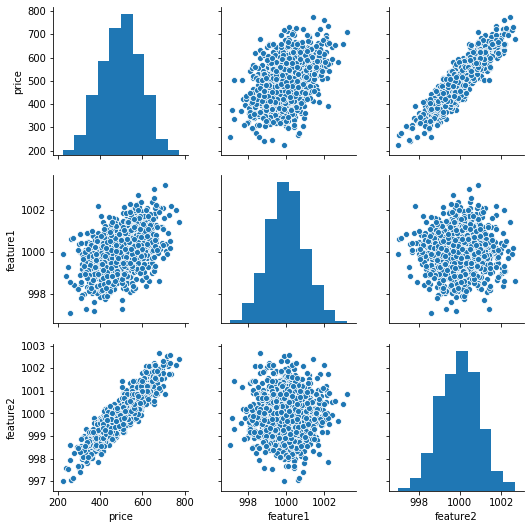

In [71]:
sns.pairplot(df)

## Test/Train Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1', 'feature2']].values
# Label
y = df['price'].values

In [74]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X_train.shape

(700, 2)

In [76]:
X_test.shape

(300, 2)

In [77]:
y_train.shape

(700,)

In [78]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

**We scale the feature data. (Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance. Normalizing the output will not affect shape of function, so it's generally not necessary.)**

In [79]:
# An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one.
from sklearn.preprocessing import MinMaxScaler

In [80]:
# help(MinMaxScaler)

In [81]:
scaler = MinMaxScaler()

In [82]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [83]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## TensorFlow 2.0 Syntax

### Import Options

**There are several ways we can import Keras from Tensorflow (this is hugely a personal style choice, we can use any import methods we prefer). We will use the method shown in the official TF documentation**

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [85]:
# help(Sequential)
# help(Dense)

### Model - as a list of layers

In [86]:
# model = Sequential([
#     Dense(4, activation = 'relu'), 
#     Dense(2, activation = 'relu'), 
#     Dense(1)
# ])

### Model - adding in layers one by one

In [87]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem we are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as we can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [88]:
model.fit(x = X_train, y = y_train, epochs = 250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256489.5785
Epoch 2/250
700/700 [==============================] - 0s 98us/sample - loss: 256349.9263
Epoch 3/250
700/700 [==============================] - 0s 98us/sample - loss: 256180.6021
Epoch 4/250
700/700 [==============================] - 0s 100us/sample - loss: 255961.3947
Epoch 5/250
700/700 [==============================] - 0s 99us/sample - loss: 255709.7902
Epoch 6/250
700/700 [==============================] - 0s 98us/sample - loss: 255416.3695
Epoch 7/250
700/700 [==============================] - 0s 98us/sample - loss: 255073.6946
Epoch 8/250
700/700 [==============================] - 0s 98us/sample - loss: 254674.3226
Epoch 9/250
700/700 [==============================] - 0s 99us/sample - loss: 254190.2409
Epoch 10/250
700/700 [==============================] - 0s 100us/sample - loss: 253593.2145
Epoch 11/250
700/700 [==============================] - 0s 101us/sample - los

700/700 [==============================] - 0s 150us/sample - loss: 934.5418
Epoch 91/250
700/700 [==============================] - 0s 148us/sample - loss: 897.8647
Epoch 92/250
700/700 [==============================] - 0s 141us/sample - loss: 864.1310
Epoch 93/250
700/700 [==============================] - 0s 142us/sample - loss: 828.2647
Epoch 94/250
700/700 [==============================] - 0s 148us/sample - loss: 793.4818
Epoch 95/250
700/700 [==============================] - 0s 137us/sample - loss: 757.1547
Epoch 96/250
700/700 [==============================] - 0s 133us/sample - loss: 722.8761
Epoch 97/250
700/700 [==============================] - 0s 214us/sample - loss: 686.0787
Epoch 98/250
700/700 [==============================] - 0s 195us/sample - loss: 658.3718
Epoch 99/250
700/700 [==============================] - 0s 165us/sample - loss: 629.5483
Epoch 100/250
700/700 [==============================] - 0s 138us/sample - loss: 600.7099
Epoch 101/250
700/700 [==========

700/700 [==============================] - 0s 144us/sample - loss: 24.4873
Epoch 183/250
700/700 [==============================] - 0s 136us/sample - loss: 24.3303
Epoch 184/250
700/700 [==============================] - 0s 133us/sample - loss: 24.5289
Epoch 185/250
700/700 [==============================] - 0s 102us/sample - loss: 24.3771
Epoch 186/250
700/700 [==============================] - 0s 134us/sample - loss: 24.2778
Epoch 187/250
700/700 [==============================] - 0s 129us/sample - loss: 24.3796
Epoch 188/250
700/700 [==============================] - 0s 145us/sample - loss: 24.9791
Epoch 189/250
700/700 [==============================] - 0s 152us/sample - loss: 24.1048
Epoch 190/250
700/700 [==============================] - 0s 107us/sample - loss: 24.8942
Epoch 191/250
700/700 [==============================] - 0s 94us/sample - loss: 24.3875
Epoch 192/250
700/700 [==============================] - 0s 128us/sample - loss: 24.2808
Epoch 193/250
700/700 [=============

## Evaluation

**Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.**

In [89]:
model.history.history

{'loss': [256489.57848214285,
  256349.9263392857,
  256180.60214285715,
  255961.39473214286,
  255709.79017857142,
  255416.3694642857,
  255073.69464285715,
  254674.3225892857,
  254190.24089285714,
  253593.2144642857,
  252872.43401785713,
  252050.97625,
  251116.69767857142,
  250067.0598214286,
  248896.70517857143,
  247597.57642857142,
  246148.849375,
  244551.63776785714,
  242770.19035714286,
  240787.16794642858,
  238608.19589285715,
  236216.31857142856,
  233600.98044642858,
  230769.24919642857,
  227671.44044642858,
  224354.83026785715,
  220778.21910714285,
  216936.1136607143,
  212849.36285714287,
  208454.47044642858,
  203780.38116071429,
  198823.76125,
  193601.7269642857,
  188087.80401785715,
  182242.04580357144,
  176135.90767857144,
  169758.11785714285,
  163121.35419642858,
  156208.74196428573,
  149032.64276785715,
  141601.19629464287,
  133947.62191964284,
  126107.66602678571,
  118142.32357142857,
  109973.08129464286,
  101677.01633928572,
  93

In [90]:
loss_df = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training Loss per Epoch')

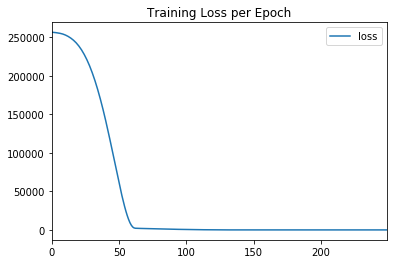

In [91]:
loss_df.plot()
plt.title("Training Loss per Epoch")

### Compare final evaluation (MSE) on training set and test set.

**These should hopefully be fairly close to each other.**

In [92]:
model.metrics_names

['loss']

In [95]:
# Test Score
model.evaluate(X_test, y_test, verbose = 0)

25.996099090576173

In [97]:
# Training Score
model.evaluate(X_train, y_train, verbose = 0)

24.068577771868025

### Further Evaluations

In [106]:
predictions = model.predict(X_test)

In [107]:
predictions

array([[405.9999 ],
       [624.6787 ],
       [593.2173 ],
       [573.24615],
       [367.2156 ],
       [580.2261 ],
       [515.94446],
       [459.93747],
       [550.2206 ],
       [448.32968],
       [612.9028 ],
       [549.97327],
       [419.83463],
       [409.57886],
       [652.47217],
       [438.08243],
       [509.39444],
       [661.1123 ],
       [663.7866 ],
       [566.5768 ],
       [334.78024],
       [445.61972],
       [383.17868],
       [379.41473],
       [567.6201 ],
       [611.6877 ],
       [533.3458 ],
       [428.61832],
       [656.62555],
       [414.82297],
       [443.43356],
       [485.99545],
       [439.1925 ],
       [683.0864 ],
       [425.52948],
       [418.4061 ],
       [502.8654 ],
       [551.4741 ],
       [510.62216],
       [396.0147 ],
       [619.7287 ],
       [417.3714 ],
       [605.55786],
       [446.77533],
       [502.88904],
       [582.8115 ],
       [670.25824],
       [491.2944 ],
       [319.135  ],
       [486.29196],


In [108]:
predictions = pd.Series(predictions.reshape(300,))

In [109]:
predictions

0      405.999908
1      624.678711
2      593.217285
3      573.246155
4      367.215607
          ...    
295    529.982788
296    516.200562
297    610.767517
298    417.704681
299    411.583527
Length: 300, dtype: float32

In [121]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])

In [122]:
pred_df.head(5)

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [123]:
pred_df = pd.concat([pred_df, predictions], axis = 1)

In [124]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [125]:
pred_df.head(5)

,Test True Y,Model Predictions
0,402.296319,405.999908
1,624.156198,624.678711
2,582.455066,593.217285
3,578.588606,573.246155
4,371.224104,367.215607


**Let's compare to the real test labels!**

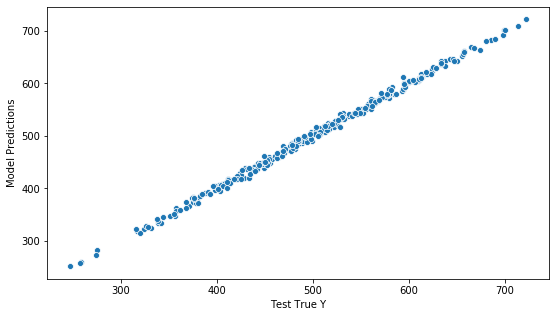

In [137]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [139]:
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

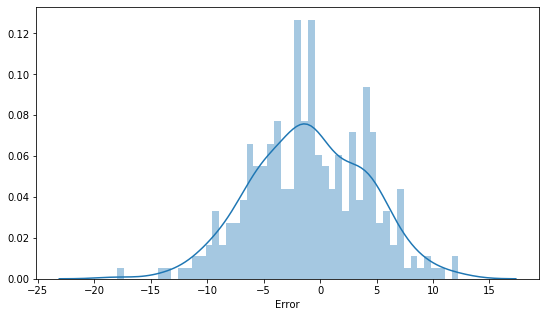

In [142]:
plt.figure(figsize=(9,5))
sns.distplot(pred_df['Error'],bins=50)

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [144]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.122692803864071

In [145]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.996101476060243

In [158]:
#root mean squared error
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.098637217537667

In [161]:
explained_variance_score(y_test, predictions)

0.9971538084776836

# Predicting on brand new data

**What if we just saw a brand new gemstone from the ground? What should we price it at? This is the exact same procedure as predicting on a new test data.**

In [150]:
# [[Feature1, Feature2]]
new_gem = [[998, 1000]]

In [151]:
# Don't forget to scale!
new_gem_scaled = scaler.transform(new_gem)

In [153]:
model.predict(new_gem_scaled)

array([[420.3925]], dtype=float32)

## Saving and Loading a Model

In [154]:
from tensorflow.keras.models import load_model

In [155]:
model.save('my_gem_model.h5')

In [156]:
later_model = load_model('my_gem_model.h5')

In [157]:
later_model.predict(new_gem_scaled)

array([[420.3925]], dtype=float32)